In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from numpy import hstack
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
import itertools
%matplotlib inline



In [ ]:
Datos3K=read_csv('/content/drive/MyDrive/Colab Notebooks/3Koutfit.csv',delimiter=',', index_col=False)
Datos3K = array(Datos3K)



In [ ]:
Datos3K.shape

(150528, 2994)

In [ ]:
Yvalues = []
for j in range(4):
  for i in range(2994): 
    Yvalues.append(i)
print(len(Yvalues))


11976


In [ ]:
parte1=(Datos3K[0:50176,:])
parte2=(Datos3K[50176:100352,:])
parte3=(Datos3K[100352:,:])
print(parte1.shape,parte2.shape,parte3.shape)

(50176, 2994) (50176, 2994) (50176, 2994)


In [ ]:
Data1=list()
Data1 = np.concatenate([parte1, parte2,parte3])
Data2 = np.concatenate([parte1, parte3,parte2])
Data3 = np.concatenate([parte3, parte2,parte1])
Data4 = np.concatenate([parte2, parte3,parte1])

Data1

array([[185., 168.,   0., ...,   0.,   0.,   0.],
       [181., 164.,   0., ...,   0.,   0.,   0.],
       [174., 154.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   1.,   1., ...,   3.,   1.,   0.],
       [  0.,   0.,   1., ...,   7.,   1.,   0.],
       [  0.,   1.,   1., ...,  15.,   1.,   0.]])

In [ ]:
Data1=Data1.transpose()
Data2=Data2.transpose()
Data3=Data3.transpose()
Data4=Data4.transpose()
DatosCompletos=np.concatenate([Data1, Data2,Data3,Data4])

In [ ]:
DatosCompletos=DatosCompletos.transpose()

In [ ]:
print(DatosCompletos.shape)

(150528, 11976)


In [ ]:
Yvalues= array(Yvalues)
Yvalues = Yvalues.reshape(1,11976) 
DatosCompletos=np.concatenate([DatosCompletos,Yvalues])

In [ ]:
DatosCompletos.shape

(150529, 11976)

In [ ]:
DatosCompletos

array([[1.850e+02, 1.680e+02, 0.000e+00, ..., 0.000e+00, 1.700e+01,
        1.630e+02],
       [1.810e+02, 1.640e+02, 0.000e+00, ..., 0.000e+00, 5.400e+01,
        1.700e+02],
       [1.740e+02, 1.540e+02, 0.000e+00, ..., 0.000e+00, 1.050e+02,
        2.000e+02],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 2.000e+00, ..., 2.991e+03, 2.992e+03,
        2.993e+03]])

In [ ]:
def split_sequence(sequences):
    X,y = list(),list()
    #print(len(sequences))
    for i in range(11976):

        #print("i",i) 
        # ordenar las partes de entrada y salida del patrón
        seq_x,seq_y = sequences[:-1,i],sequences[-1,i]
        # Las "x" están formadas por los pares de la seq1 y seq2.
        X.append(seq_x)
        #Las "y" son los valores de la columna final (out_seq)
        y.append(seq_y)
        #print("valores de las secuencias")
        #print("seq_x",seq_x)
        #print("seq_y",seq_y)

    return array(X),array(y)




# convertir a entrada y salida (x e y)
X, y = split_sequence(DatosCompletos)

In [ ]:
print(X.shape)
print(y.shape)

(11976, 150528)
(11976,)


In [ ]:
X =np.reshape(X,(X.shape[0],224,672,1))
X.shape

(11976, 224, 672, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
from keras.layers.regularization.dropout import Dropout

ModeloCNN= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,672,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='Softmax')
])

In [ ]:
ModeloCNN.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [ ]:
ModeloCNN.fit(X_train,y_train,epochs=20, batch_size=320,validation_data=(X_test,y_test))

Epoch 1/20
38/38 [==============================] - 23s 299ms/step - loss: 2983013.0000 - accuracy: 3.3738e-04 - val_loss: 3033902.7500 - val_accuracy: 0.0000e+00
Epoch 2/20
38/38 [==============================] - 11s 283ms/step - loss: 2983013.0000 - accuracy: 3.3738e-04 - val_loss: 3033902.7500 - val_accuracy: 0.0000e+00
Epoch 3/20
38/38 [==============================] - 11s 280ms/step - loss: 2983013.2500 - accuracy: 3.3738e-04 - val_loss: 3033902.7500 - val_accuracy: 0.0000e+00
Epoch 4/20
38/38 [==============================] - 11s 281ms/step - loss: 2983013.5000 - accuracy: 3.3738e-04 - val_loss: 3033902.7500 - val_accuracy: 0.0000e+00
Epoch 5/20
38/38 [==============================] - 11s 282ms/step - loss: 2983013.2500 - accuracy: 3.3738e-04 - val_loss: 3033902.7500 - val_accuracy: 0.0000e+00
Epoch 6/20
38/38 [==============================] - 11s 280ms/step - loss: 2983013.2500 - accuracy: 3.3738e-04 - val_loss: 3033902.7500 - val_accuracy: 0.0000e+00
Epoch 7/20
38/38 [====

KeyboardInterrupt: ignored

In [ ]:
y_pred = ModeloCNN.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)
cm = confusion_matrix(y_test, y_pred)

4/4 [==============================] - 0s 44ms/step


In [ ]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

[Text(0, 0.5, 'False'), Text(0, 6.5, 'True')]

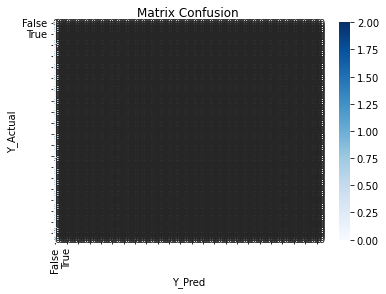

<Figure size 1080x576 with 0 Axes>

In [ ]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')
pyplot.figure(figsize=(15,8))
# etiquetas de X e Y
ax.set_title('Matrix Confusion');
ax.set_xlabel('Y_Pred')
ax.set_ylabel('Y_Actual');

# Sub etiquetas de X e Y
ax.xaxis.set_ticklabels(["False","True"])
ax.yaxis.set_ticklabels(["False","True"])


In [ ]:
cm= confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')

In [ ]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')


NameError: ignored